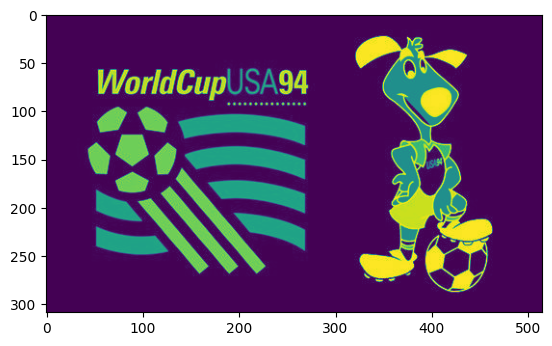

In [ ]:
# 1.1 Biến đổi cường độ ảnh (Image inverse transformation)
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('world_cup.jpg').convert('L')

# convert image 1 into an ndarray
im_1 = np.asarray(img)
# inversion operation
im_2 = 255 - im_1
# convert image 2 from ndarray to image
new_img = Image.fromarray(im_2)

img.show()

plt.imshow(new_img)
plt.show()

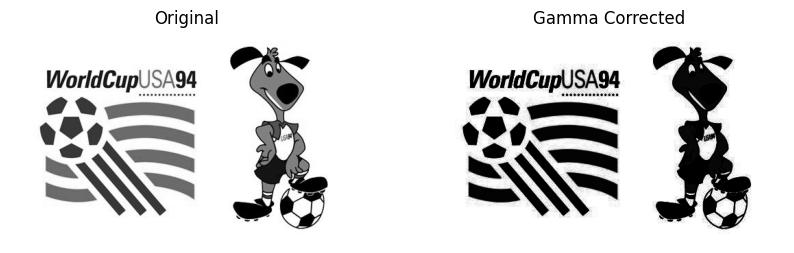

In [ ]:
# 1.2 Thay đổi chất lượng hình ảnh với Power law (Gamma-Correction)

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open a grayscale image
img = Image.open('world_cup.jpg').convert('L')

# Convert image to ndarray
im_1 = np.asarray(img).astype(float)

# Initialize gamma
gamma = 5

# Normalize to range [0, 1]
normalized = im_1 / 255.0

# Apply gamma correction
gamma_corrected = np.power(normalized, gamma)

# Scale back to [0, 255]
corrected = np.clip(gamma_corrected * 255.0, 0, 255).astype(np.uint8)

# Convert back to image
d = Image.fromarray(corrected)

# Display original and corrected images
img.show(title="Original")
d.show(title="Gamma Corrected")

# Display using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(im_1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gamma Corrected")
plt.imshow(corrected, cmap='gray')
plt.axis('off')

plt.show()


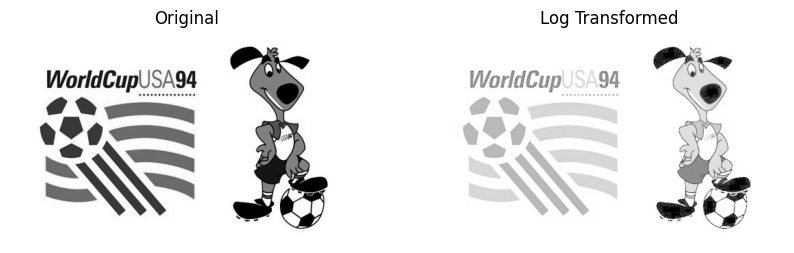

In [ ]:
# 1.3 Thay đổi cường độ điểm ảnh với Log Transformation

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open a grayscale image
img = Image.open('world_cup.jpg').convert('L')

# Convert image to ndarray
im_1 = np.asarray(img).astype(float)

# Find maximum value
b2 = np.max(im_1)

# Apply log transformation
c = (128.0 * np.log(1 + im_1)) / np.log(1 + b2)

# Convert to uint8 and ensure values are clipped to [0, 255]
c1 = np.clip(c, 0, 255).astype(np.uint8)

# Convert back to image
d = Image.fromarray(c1)

# Show original and transformed image
img.show(title="Original")
d.show(title="Log Transformed")

# Show using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(im_1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Log Transformed")
plt.imshow(c1, cmap='gray')
plt.axis('off')

plt.show()


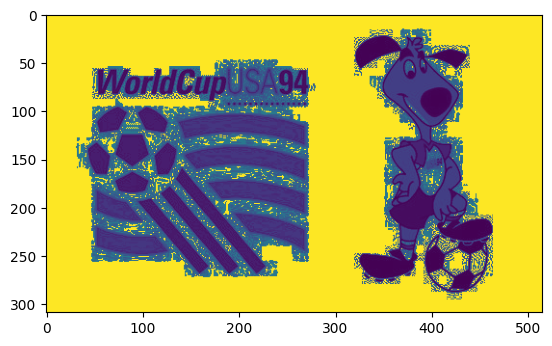

In [ ]:
# 1.4. Histogram equalization

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import imageio.v2 as iio

# open a gryscale image
img = Image.open('world_cup.jpg').convert('L')
# convert image1 into an ndarray
im1 = np.asarray(img)
# convert 2d ndarray from 1d array
b1 = im1.flatten()
# histogram and bin are computed
hist, bin = np.histogram(im1, 256, [0, 255])
# cumulative distribution function is computed
cdf = hist.cumsum()
# places where cdf=0 is masked or ignored and rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)
# histogram equalization is performed
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
# the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
# cdf values are assigned in the flattened array
im2 = cdf[b1]
# im2 is 1d so we use command to make it into 2d
im3 = np.reshape(im2, im1.shape)
# converting im3 to an image
im4 = Image.fromarray(im3)
img.show()
im4.show()
plt.imshow(im4)
plt.show()

0 255


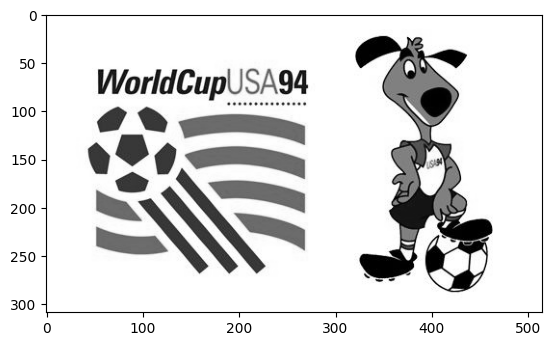

In [ ]:
# 1.5. Thay đổi ảnh với Contrast Stretching

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import imageio.v2 as iio

# open a gryscale image
img = Image.open('world_cup.jpg').convert('L')
# convert image1 into an ndarray
im1 = np.asarray(img)
# finding the maximum and minimum pixel values
b = im1.max()
a = im1.min()
print(a,b)
# converting im1 to float
c = im1.astype(float)
# contrast stretching transformation
im2 = 255 * (c - a)/(b - a)
# im2 is converted from ndarray to image
im3 = Image.fromarray(im2)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

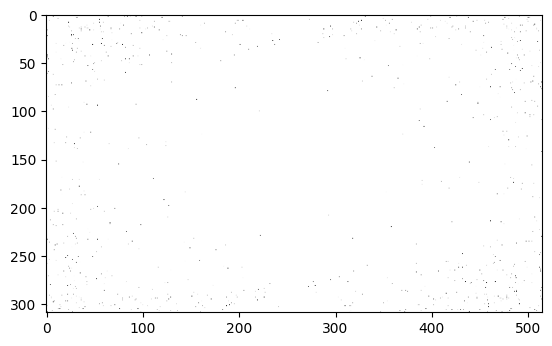

In [ ]:
# 1.6. Biến đổi Fourier

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import imageio.v2 as iio

# open a gryscale image
img = Image.open('world_cup.jpg').convert('L')
# convert image1 into an ndarray
im1 = np.asarray(img)
# perfroming FFT
c = abs(scipy.fftpack.fft2(im1))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
d = d.astype(float)
# im2 is converted from ndarray to image
im3 = Image.fromarray(d)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

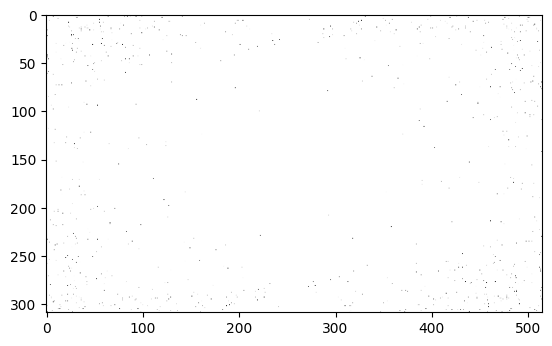

In [1]:
# 1.6.1 Biến đổi ảnh với Fast Fourier

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import imageio.v2 as iio

# open a gryscale image
img = Image.open('world_cup.jpg').convert('L')
# convert image1 into an ndarray
im1 = np.asarray(img)
# perfroming FFT
c = abs(scipy.fftpack.fft2(im1))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
d = d.astype(float)
# im2 is converted from ndarray to image
im3 = Image.fromarray(d)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

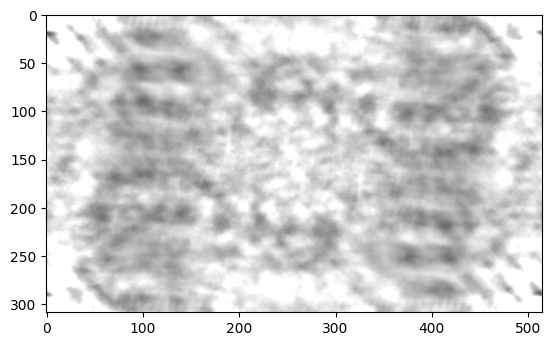

In [2]:
# 1.6.2 Lọc ảnh trong miền tần suất
# Butterworth Lowpass Filter

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import imageio.v2 as iio

# open a gryscale image
img = Image.open('world_cup.jpg').convert('L')
# convert image1 into an ndarray
im1 = np.asarray(img)
# perfroming FFT
c = abs(scipy.fftpack.fft2(im1))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
# initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M/2
center2 = N/2

d_0 = 30.0 # cut-off radius
t1 = 1 # the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1

# defining the convolution function for BLPF
for i in range(1, M):
  for j in range(1, N):
    r1 = (i - center1)**2 + (j - center2)**2
    # euclidean distance from origin is computed
    r = math.sqrt(r1)
    # using cut-off radius to eliminate high frequency
    if r > d_0:
      H[i, j] = 1/(1 + (r/d_0)**t1)
# H is converted from ndarray to image
H = H.astype(float)
H = Image.fromarray(H)
# performing the convolution
con = d * H
# computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))
# e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()





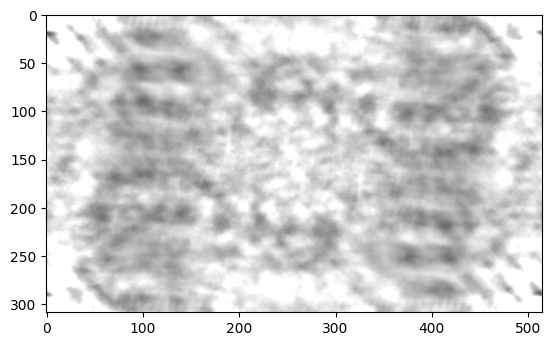

In [3]:
# Butterworth Highpass Filter

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import imageio.v2 as iio

# open a gryscale image
img = Image.open('world_cup.jpg').convert('L')
# convert image1 into an ndarray
im1 = np.asarray(img)
# perfroming FFT
c = abs(scipy.fftpack.fft2(im1))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
# initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M/2
center2 = N/2

d_0 = 30.0 # cut-off radius
t1 = 1 # the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1

# defining the convolution function for BLPF
for i in range(1, M):
  for j in range(1, N):
    r1 = (i - center1)**2 + (j - center2)**2
    # euclidean distance from origin is computed
    r = math.sqrt(r1)
    # using cut-off radius to eliminate high frequency
    if r > d_0:
      H[i, j] = 1/(1 + (r/d_0)**t1)
# H is converted from ndarray to image
H = H.astype(float)
H = Image.fromarray(H)
# performing the convolution
con = d * H
# computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))
# e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()
